In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
train = pd.read_csv("data/train.csv", index_col="id", parse_dates=["timestamp"])
test = pd.read_csv("data/test.csv", index_col="id", parse_dates=["timestamp"])
macro = pd.read_csv("data/macro.csv", parse_dates=["timestamp"])

### Data Review

In [5]:
train.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,
1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [6]:
test.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
id,,,,,,,,,,,,,,,,,,,,,
30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,3.0,...,8,0,0,0,1,10,1,0,14,1
30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,1.0,...,4,1,1,0,2,11,0,1,12,1
30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,2.0,...,42,11,4,0,10,21,0,10,71,11
30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,3.0,...,1,1,2,0,0,10,0,0,2,0
30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,1.0,...,5,1,1,0,2,12,0,1,11,1


In [7]:
macro.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.836,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


In [460]:
dtype_df = train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
print("Variables data type:")
dtype_df.groupby("Column Type").aggregate('count').reset_index()

Variables data type:


,Column Type,Count
0,datetime64[ns],1
1,int64,155
2,float64,120
3,object,15


In [16]:
# more missing values in the train dataset for build_year, state and kitch_sq etc..
train.isnull().sum().sort_values(ascending=False)

hospital_beds_raion                      14441
build_year                               13605
state                                    13559
cafe_sum_500_min_price_avg               13281
cafe_sum_500_max_price_avg               13281
cafe_avg_price_500                       13281
kitch_sq                                  9572
num_room                                  9572
material                                  9572
max_floor                                 9572
preschool_quota                           6688
school_quota                              6685
cafe_sum_1000_max_price_avg               6524
cafe_sum_1000_min_price_avg               6524
cafe_avg_price_1000                       6524
life_sq                                   6383
build_count_frame                         4991
build_count_after_1995                    4991
build_count_wood                          4991
build_count_block                         4991
raion_build_count_with_material_info      4991
build_count_p

In [17]:
test.isnull().sum().sort_values(ascending=False)

hospital_beds_raion                      3418
cafe_avg_price_500                       3159
cafe_sum_500_max_price_avg               3159
cafe_sum_500_min_price_avg               3159
preschool_quota                          1596
school_quota                             1595
cafe_sum_1000_min_price_avg              1222
cafe_sum_1000_max_price_avg              1222
cafe_avg_price_1000                      1222
build_count_wood                         1218
build_count_1921-1945                    1218
build_count_after_1995                   1218
build_count_1971-1995                    1218
build_count_1946-1970                    1218
raion_build_count_with_material_info     1218
build_count_block                        1218
build_count_before_1920                  1218
build_count_frame                        1218
raion_build_count_with_builddate_info    1218
build_count_brick                        1218
build_count_mix                          1218
build_count_slag                  

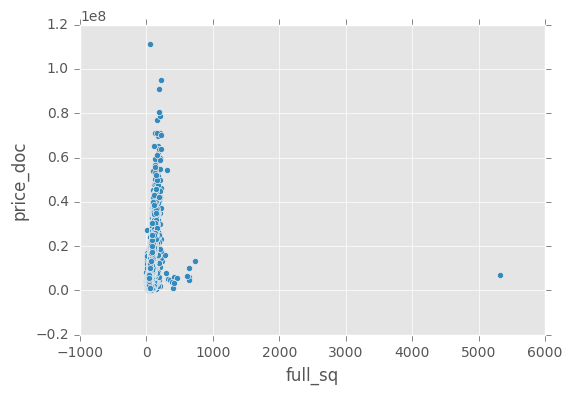

In [23]:
train[["price_doc", "full_sq"]].plot(kind="scatter", x="full_sq", y="price_doc")
pass

In [24]:
# there is a very high price 1.111111e+08 -> probably outlier
train.price_doc.describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

In [8]:
# full_sq has an outlier -> max 5326 remove it
train.full_sq.describe()

count    30471.000000
mean        54.214269
std         38.031487
min          0.000000
25%         38.000000
50%         49.000000
75%         63.000000
max       5326.000000
Name: full_sq, dtype: float64

In [9]:
test.full_sq.describe()

count    7662.000000
mean       53.701164
std        20.104320
min         0.000000
25%        39.200000
50%        50.410000
75%        63.300000
max       403.000000
Name: full_sq, dtype: float64

In [20]:
# values for full sq are rounded in the train dataset
train.full_sq.head()

id
1    43
2    34
3    43
4    89
5    77
Name: full_sq, dtype: int64

In [21]:
test.full_sq.head()

id
30474    39.0
30475    79.2
30476    40.5
30477    62.8
30478    40.0
Name: full_sq, dtype: float64

In [18]:
# remove the 7478 value
train.life_sq.describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

In [19]:
test.life_sq.describe()

count    6486.000000
mean       32.660037
std        22.737855
min         0.000000
25%        19.900000
50%        30.400000
75%        41.800000
max       869.000000
Name: life_sq, dtype: float64

In [38]:
# build year is very messy -> maybe every data which is not between 1691 and 2020 is NA
train.build_year.value_counts(dropna=False)

NaN            7998
 2014.0         703
 2015.0         645
 1970.0         418
 0.0            413
 1969.0         407
 2013.0         391
 1968.0         389
 1967.0         384
 1965.0         378
 1972.0         360
 1974.0         357
 1971.0         352
 1966.0         348
 1960.0         344
 1962.0         338
 1973.0         333
 2016.0         330
 1963.0         325
 1964.0         315
 1975.0         309
 1961.0         297
 1976.0         263
 1977.0         260
 2006.0         242
 1.0            240
 1979.0         236
 1978.0         235
 2008.0         234
 2012.0         233
               ... 
 1890.0           5
 1912.0           5
 1947.0           4
 1924.0           3
 1949.0           3
 1914.0           3
 1943.0           2
 1860.0           2
 1907.0           2
 1900.0           2
 3.0              2
 1896.0           2
 1946.0           2
 1941.0           2
 1920.0           1
 1691.0           1
 1906.0           1
 1895.0           1
 1904.0           1


In [39]:
test.build_year.value_counts(dropna=False)

NaN        1049
 2017.0     413
 2016.0     400
 0.0        369
 2013.0     260
 2015.0     259
 2014.0     199
 1.0        187
 1969.0     141
 1966.0     138
 1968.0     137
 1967.0     133
 1971.0     133
 1970.0     122
 1960.0     118
 1972.0     118
 1973.0     116
 1964.0     114
 1962.0     111
 1965.0     109
 1974.0     109
 1961.0     102
 1963.0      98
 1975.0      97
 1977.0      96
 1978.0      94
 2006.0      92
 1976.0      86
 1980.0      82
 1979.0      81
           ... 
 1911.0       3
 1932.0       3
 1939.0       3
 1927.0       3
 1938.0       3
 1931.0       3
 1917.0       3
 1930.0       3
 1941.0       2
 1890.0       2
 1914.0       2
 1945.0       1
 1935.0       1
 1948.0       1
 1902.0       1
 2.0          1
 1906.0       1
 215.0        1
 1895.0       1
 1943.0       1
 1912.0       1
 1905.0       1
 1875.0       1
 1898.0       1
 1908.0       1
 1942.0       1
 1949.0       1
 1910.0       1
 1924.0       1
 1933.0       1
Name: build_year, dtype:

In [43]:
# error in 33 -> convert to 3 and also to ordinal variable
train.state.value_counts(dropna=False)

NaN      8879
 2.0     5843
 3.0     5766
 1.0     3175
 4.0      421
 33.0       1
Name: state, dtype: int64

In [44]:
test.state.value_counts(dropna=False)

 2.0    2662
 1.0    2266
 3.0    1913
NaN      694
 4.0     127
Name: state, dtype: int64

In [45]:
train.material.value_counts(dropna=False)

 1.0    10660
NaN      7328
 2.0     2921
 5.0     1546
 4.0     1000
 6.0      630
Name: material, dtype: int64

In [46]:
test.material.value_counts(dropna=False)

1    5241
2     958
4     619
5     487
6     356
3       1
Name: material, dtype: int64

In [61]:
# too high value for floor
train.floor.describe()

count    23945.000000
mean         7.243475
std          5.117744
min          0.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         77.000000
Name: floor, dtype: float64

In [62]:
test.floor.describe()

count    7662.000000
mean        7.652571
std         5.099418
min         1.000000
25%         4.000000
50%         7.000000
75%        11.000000
max        41.000000
Name: floor, dtype: float64

In [65]:
train.max_floor.describe()

count    16756.000000
mean        12.433815
std          6.310940
min          0.000000
25%          9.000000
50%         12.000000
75%         17.000000
max        117.000000
Name: max_floor, dtype: float64

In [66]:
test.max_floor.describe()

count    7662.000000
mean       12.591099
std         6.659291
min         0.000000
25%         9.000000
50%        14.000000
75%        17.000000
max        48.000000
Name: max_floor, dtype: float64

In [68]:
train.product_type.value_counts(dropna=False)

Investment       19368
OwnerOccupier     4576
Name: product_type, dtype: int64

In [69]:
# NaN in test for product type
test.product_type.value_counts(dropna=False)

Investment       4998
OwnerOccupier    2631
NaN                33
Name: product_type, dtype: int64

In [715]:
# train prices are round values for investment type
train[["price_doc", "product_type"]][train.product_type == "Investment"].price_doc.value_counts(dropna=False).head(30)

2000000    750
1000000    743
6000000    369
3000000    329
6500000    327
7000000    319
5500000    309
6300000    292
5000000    292
7500000    275
6200000    275
6400000    232
6800000    229
8500000    229
8000000    227
6100000    218
5800000    208
5900000    206
5700000    202
7200000    199
5300000    197
6900000    190
6600000    189
9000000    185
6700000    185
5600000    183
5200000    181
7400000    179
5400000    170
7300000    157
Name: price_doc, dtype: int64

In [78]:
# for owner types values are random
train[["price_doc", "product_type"]][~(train.product_type == "Investment")].price_doc.value_counts(dropna=False).head(10)

4400000    25
3912000    12
3274574    12
2199436    11
4209255    10
6592000    10
3059062     9
4238000     9
6552000     9
3813607     9
Name: price_doc, dtype: int64

In [91]:
# missing values for train data
train.num_room.value_counts(dropna=False)

NaN      7186
 2.0     6492
 1.0     5905
 3.0     3915
 4.0      381
 5.0       38
 0.0        8
 6.0        7
 8.0        3
 10.0       2
 7.0        1
 19.0       1
 9.0        1
 17.0       1
Name: num_room, dtype: int64

In [92]:
test.num_room.value_counts(dropna=False)

2     3097
1     2855
3     1554
4      133
5       19
7        2
19       1
6        1
Name: num_room, dtype: int64

In [98]:
# differences float versus integer 
train.num_room.tail()

id
30467    2.0
30469    2.0
30470    4.0
30472    2.0
30473    2.0
Name: num_room, dtype: float64

In [99]:
test.num_room.tail()

id
38131    2
38132    2
38133    1
38134    1
38135    3
Name: num_room, dtype: int64

In [47]:
# check some basic errors
train[(train.full_sq - train.life_sq) < 0].timestamp.count()

37

In [48]:
test[(test.full_sq - test.life_sq) < 0].timestamp.count()

12

In [49]:
train[(train.full_sq - train.kitch_sq) < 0].timestamp.count()

12

In [50]:
test[(test.full_sq - test.kitch_sq) < 0].timestamp.count()

12

In [51]:
train[(train.life_sq - train.kitch_sq) < 0].timestamp.count()

56

In [52]:
test[(test.life_sq - test.kitch_sq) < 0].timestamp.count()

24

In [75]:
train[(train.max_floor - train.floor) < 0].timestamp.count()

1484

In [76]:
test[(test.max_floor - test.floor) < 0].timestamp.count()

643

In [227]:
# remove them
train[train.full_sq == 0]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,
17935,2014-04-28,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,1,7,1,0,12,1,4425000


In [229]:
test[test.full_sq == 0]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
id,,,,,,,,,,,,,,,,,,,,,
30938,2015-08-05,0.0,38.0,7,19,1,0.0,1,0.0,1.0,...,3,1,0,0,1,6,0,0,6,1


In [243]:
train[(train.full_sq == 0) | (train.full_sq == 1)].timestamp.count()

26

In [244]:
test[(test.full_sq == 0) | (test.full_sq == 1)].timestamp.count()

2

In [245]:
train[(train.life_sq == 0) | (train.life_sq == 1)].timestamp.count()

435

In [246]:
test[(test.life_sq == 0) | (test.life_sq == 1)].timestamp.count()

329

In [235]:
train[train.kitch_sq == 0].timestamp.count()

1381

In [236]:
test[test.kitch_sq == 0].timestamp.count()

376

In [237]:
# convert to NA
train[train.kitch_sq == 1].timestamp.count()

4854

In [238]:
test[test.kitch_sq == 1].timestamp.count()

1752

In [321]:
# replace 1968 and 1000 with missing values
test.kitch_sq.dropna().sort_values(ascending=False).head()

id
31381    1968.0
36811    1000.0
36011     116.7
35339      86.3
34333      74.0
Name: kitch_sq, dtype: float64

In [365]:
# average room size
train[((train.full_sq / train.life_sq) > 0) > train.num_room]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,
18126,2014-05-05,112,112.0,3.0,3.0,1.0,0.0,0.0,0.0,1.0,...,10,3,0,10,9,0,0,38,4,7600002
18672,2014-05-20,209,209.0,0.0,3.0,4.0,2007.0,0.0,0.0,1.0,...,1,0,0,1,7,0,0,4,1,10500000
21442,2014-08-12,74,41.0,12.0,0.0,1.0,NaN,0.0,12.0,NaN,...,0,0,0,1,7,1,0,12,1,8150340
23194,2014-10-01,84,84.0,3.0,15.0,2.0,0.0,0.0,0.0,1.0,...,1,0,0,1,4,1,0,14,1,7580000
24883,2014-11-18,34,19.0,9.0,16.0,5.0,1982.0,0.0,9.0,3.0,...,5,1,0,5,12,0,0,29,3,5400000
25375,2014-11-26,30,18.0,2.0,8.0,2.0,1961.0,0.0,6.0,2.0,...,48,8,2,12,33,2,9,89,10,1000000
27457,2015-01-22,135,134.0,3.0,3.0,6.0,2013.0,0.0,0.0,1.0,...,3,1,0,0,7,0,0,3,2,9308100


In [363]:
train[train.num_room == 0].timestamp.count()

14

In [364]:
test[test.num_room == 0].timestamp.count()

0

In [367]:
train[((train.full_sq - train.life_sq) == 0)].timestamp.count()

2750

In [368]:
test[((test.full_sq - test.life_sq) == 0)].timestamp.count()

670

In [403]:
# remove those ones as num_room doesn't make any sense here
train[(train.full_sq > 0) & (train.life_sq == 1) & (train.num_room == 1)]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,
10459,2013-09-12,35,1.0,9.0,16.0,1.0,NaN,1.0,1.0,NaN,...,1,0,0,1,6,1,0,13,1,3280650
10511,2013-09-14,46,1.0,3.0,17.0,4.0,NaN,1.0,1.0,1.0,...,10,3,0,10,9,0,0,38,4,4121629
10531,2013-09-16,38,1.0,2.0,17.0,1.0,NaN,1.0,1.0,1.0,...,1,0,0,2,3,0,0,6,1,4294675
10644,2013-09-21,41,1.0,2.0,1.0,6.0,NaN,1.0,41.0,1.0,...,19,7,2,3,17,0,0,51,3,7529400
10727,2013-09-25,46,1.0,12.0,1.0,1.0,NaN,1.0,1.0,1.0,...,2,2,0,1,12,1,0,8,0,4244188
10891,2013-10-01,34,1.0,8.0,1.0,1.0,NaN,1.0,1.0,1.0,...,2,2,0,1,12,1,0,8,0,3795000
10897,2013-10-01,38,1.0,7.0,17.0,1.0,NaN,1.0,1.0,1.0,...,1,0,0,4,6,0,0,5,1,4033260
11160,2013-10-10,43,1.0,13.0,13.0,6.0,NaN,1.0,40.0,1.0,...,11,2,1,5,4,0,1,32,5,6600879
11532,2013-10-24,46,1.0,25.0,25.0,6.0,2015.0,1.0,1.0,1.0,...,1,0,0,2,3,0,0,6,1,4966206


In [376]:
test[(test.full_sq > 0) & (test.life_sq == 1) & (test.num_room == 1)]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
id,,,,,,,,,,,,,,,,,,,,,
30518,2015-07-03,35.82,1.0,14,1,1,2015.0,1,1.0,1.0,...,94,72,40,9,18,36,1,9,107,6
30549,2015-07-06,43.30,1.0,19,22,1,2015.0,1,1.0,1.0,...,4,1,1,0,2,11,0,1,12,1
30662,2015-07-15,56.80,1.0,10,25,1,2015.0,1,1.0,1.0,...,18,11,2,1,5,4,0,1,32,5
30793,2015-07-27,67.67,1.0,21,1,1,2016.0,1,1.0,1.0,...,123,91,50,12,22,38,1,11,122,7
30846,2015-07-29,39.20,1.0,11,17,1,2015.0,1,1.0,1.0,...,12,7,2,0,5,14,0,3,17,2
30855,2015-07-30,48.19,1.0,4,1,1,2017.0,1,1.0,1.0,...,41,25,3,0,14,28,1,4,92,6
30898,2015-08-04,43.34,1.0,17,25,1,2016.0,1,1.0,1.0,...,18,11,2,1,5,4,0,1,32,5
30935,2015-08-05,43.06,1.0,6,25,1,2016.0,1,1.0,1.0,...,18,11,2,1,5,4,0,1,32,5
30940,2015-08-06,39.59,1.0,3,18,1,2015.0,1,1.0,1.0,...,40,13,3,0,9,29,0,7,63,13


### Data Cleaning

In [336]:
train = pd.read_csv("data/train.csv", index_col="id", parse_dates=["timestamp"])
test = pd.read_csv("data/test.csv", index_col="id", parse_dates=["timestamp"])

In [337]:
train.timestamp.count()

30471

In [338]:
## filtering
train = train[train.full_sq < 500]
train = train[train.price_doc < 1.111111e+08]
train = train[~((train.full_sq - train.life_sq) < 0)]
train = train[~((train.full_sq - train.kitch_sq) < 0)]
train = train[~((train.life_sq - train.kitch_sq) < 0)]
train = train[~((train.max_floor - train.floor) < 0)]
train = train[~(train.full_sq == 0)]
train = train[~((train.full_sq > 0) & (train.life_sq == 1) & (train.num_room == 1))]

train.loc[train.life_sq > train.full_sq, "life_sq"] = np.NaN
test.loc[test.life_sq > test.full_sq, "life_sq"] = np.NaN

index = [31075, 32370, 33265]
test.loc[index, "life_sq"] = test.loc[index, "full_sq"]

#index = [13120, 28737, 10371, 21418]
#train.loc[index, "build_year"] = train.loc[index, "kitch_sq"]
index = [31381]
test.loc[index, "build_year"] = test.loc[index, "kitch_sq"]

#train.loc[(train.full_sq > 210) & (train.life_sq / train.full_sq < 0.3), "full_sq"] = np.NaN
#test.loc[(test.full_sq > 150) & (test.life_sq / test.full_sq < 0.3), "full_sq"] = np.NaN

train.loc[train.life_sq > 300, ["life_sq", "full_sq"]] = np.NaN
test.loc[test.life_sq > 200, ["life_sq", "full_sq"]] = np.NaN

train.loc[train.build_year == 20052009.0, "build_year"] = 2007

train.loc[train.num_room == 0, "num_room"] = np.NaN
test.loc[test.num_room == 0, "num_room"] = np.NaN

index = [10079, 11624, 17767, 19393, 24010, 26716, 29175]
train.loc[index, "num_room"] = np.NaN
index = [33648, 37787]
test.loc[index, "num_room"] = np.NaN

train.loc[(train.floor == 0) & (train.max_floor == 0), ["max_floor", "floor"]] = np.NaN
test.loc[(test.floor == 0) & (test.max_floor == 0), ["max_floor", "floor"]] = np.NaN

train.loc[train.floor == 0, "floor"] = np.NaN
test.loc[test.floor == 0, "floor"] = np.NaN
train.loc[train.max_floor == 0, "max_floor"] = np.NaN
test.loc[test.max_floor == 0, "max_floor"] = np.NaN

train.loc[train.state == 33, "state"] = np.NaN

train.loc[train.floor > train.max_floor, "max_floor"] = np.NaN
test.loc[test.floor > test.max_floor, "max_floor"] = np.NaN

train.loc[train.full_sq == 0, "full_sq"] = np.NaN
train.loc[train.full_sq == 1, "full_sq"] = np.NaN
train.loc[train.life_sq == 0, "life_sq"] = np.NaN
train.loc[train.life_sq == 1, "life_sq"] = np.NaN
train.loc[train.kitch_sq == 0, "kitch_sq"] = np.NaN
train.loc[train.kitch_sq == 1, "kitch_sq"] = np.NaN
train.loc[train.build_year < 1000, "build_year"] = np.NaN
train.loc[train.build_year > 2030, "build_year"] = np.NaN

test.loc[test.full_sq == 0, "full_sq"] = np.NaN
test.loc[test.full_sq == 1, "full_sq"] = np.NaN
test.loc[test.life_sq == 0, "life_sq"] = np.NaN
test.loc[test.life_sq == 1, "life_sq"] = np.NaN
test.loc[test.kitch_sq == 0, "kitch_sq"] = np.NaN
test.loc[test.kitch_sq == 1, "kitch_sq"] = np.NaN
test.loc[test.kitch_sq == 1968, "kitch_sq"] = np.NaN
test.loc[test.kitch_sq == 1000, "kitch_sq"] = np.NaN
test.loc[test.build_year < 1000, "build_year"] = np.NaN
test.loc[test.build_year > 2030, "build_year"] = np.NaN

## add label
train["label_value"] = 0
train.loc[train["price_doc"] == 1000000, "label_value"] = 1
train.loc[train["price_doc"] == 2000000, "label_value"] = 2

## round up test
test.full_sq = test.full_sq.round()
test.life_sq = test.life_sq.round()

In [339]:
train.timestamp.count()

28747

In [340]:
train.full_sq.describe()

count    28740.000000
mean        53.562804
std         21.115734
min          6.000000
25%         38.000000
50%         49.000000
75%         63.000000
max        388.000000
Name: full_sq, dtype: float64

In [341]:
test.full_sq.describe()

count    7658.000000
mean       53.643510
std        19.591088
min         2.000000
25%        39.000000
50%        50.000000
75%        63.000000
max       314.000000
Name: full_sq, dtype: float64

In [342]:
train.life_sq.describe()

count    23152.000000
mean        34.196182
std         17.983174
min          7.000000
25%         20.000000
50%         30.000000
75%         43.000000
max        232.000000
Name: life_sq, dtype: float64

In [345]:
test.life_sq.describe()

count    6147.000000
mean       33.930861
std        15.893917
min         2.000000
25%        21.000000
50%        31.000000
75%        43.000000
max       197.000000
Name: life_sq, dtype: float64

In [346]:
train.kitch_sq.describe()

count    14469.000000
mean         8.089225
std          3.832581
min          2.000000
25%          6.000000
50%          8.000000
75%         10.000000
max        123.000000
Name: kitch_sq, dtype: float64

In [347]:
test.kitch_sq.describe()

count    5532.000000
mean        8.757055
std         3.865231
min         1.100000
25%         6.300000
50%         8.500000
75%        10.000000
max       116.700000
Name: kitch_sq, dtype: float64

In [348]:
train.floor.describe()

count    28573.000000
mean         7.611136
std          5.266894
min          1.000000
25%          3.000000
50%          6.000000
75%         11.000000
max         44.000000
Name: floor, dtype: float64

In [349]:
test.floor.describe()

count    7662.000000
mean        7.652571
std         5.099418
min         1.000000
25%         4.000000
50%         7.000000
75%        11.000000
max        41.000000
Name: floor, dtype: float64

In [350]:
train.build_year.value_counts(dropna=False).head()

NaN        13287
 2014.0      742
 2015.0      713
 1970.0      412
 1969.0      406
Name: build_year, dtype: int64

In [351]:
test.build_year.value_counts(dropna=False).head()

NaN        1607
 2017.0     413
 2016.0     400
 2013.0     260
 2015.0     259
Name: build_year, dtype: int64

In [352]:
train.build_year.describe()

count    15460.000000
mean      1984.620052
std         20.722733
min       1691.000000
25%       1968.000000
50%       1980.000000
75%       2005.000000
max       2018.000000
Name: build_year, dtype: float64

In [353]:
test.build_year.describe()

count    6055.000000
mean     1988.625764
std        21.899159
min      1875.000000
25%      1969.000000
50%      1986.000000
75%      2013.000000
max      2019.000000
Name: build_year, dtype: float64

In [354]:
train.state.value_counts(dropna=False)

NaN     12777
 2.0     5794
 3.0     5710
 1.0     4051
 4.0      415
Name: state, dtype: int64

In [355]:
train.max_floor.describe()

count    19188.000000
mean        13.450855
std          6.099241
min          1.000000
25%          9.000000
50%         14.000000
75%         17.000000
max        117.000000
Name: max_floor, dtype: float64

In [356]:
test.max_floor.describe()

count    7019.000000
mean       13.666192
std         5.866484
min         1.000000
25%         9.000000
50%        14.000000
75%        17.000000
max        48.000000
Name: max_floor, dtype: float64

In [327]:
train[train.num_room == 0].timestamp.count()

0

In [328]:
train.to_csv("data/train_clean.csv")
test.to_csv("data/test_clean.csv")